In [1]:
## Load required packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from random import randint


In [2]:
## define directory
dir_path = os.path.abspath('')
os.chdir('..')
from pyCiSSA.pycissa import cissa, group, cissa_outlier

In [3]:
## Read data file  (source is the Ministry of Economy of Spain.)
data = pd.read_excel(dir_path + r'/EPC.xlsx',sheet_name = 'Data')
print(data.head(5))

        Date  Electric power consumption in Spain
0 1975-01-01                               6875.3
1 1975-02-01                               6201.8
2 1975-03-01                               6543.6
3 1975-04-01                               6267.2
4 1975-05-01                               5870.2


In [4]:
## Create gaps in the data
data_modified = data.copy()
N = 25  #N = number of points to remove
x = [randint(0, len(data)) for p in range(0, N)]
data_modified.loc[x,'Electric power consumption in Spain'] = -10

In [5]:
## Define parameters  (https://github.com/jbogalo/CiSSA/issues/2#issuecomment-1296310840)
L = 96
data_per_year = 12

In [6]:
## Define error correction parameters
outliers = ['<',-1]  #any value < -1 is an outlier/missing value
errors = ['value', 50]  #converge until error < 50
eigenvalue_proportion = 0.98 

In [7]:
## run pyCiSSA with outliers
x_ca, x_casa, rc = cissa_outlier(data_modified['Electric power consumption in Spain'],L,data_per_year,data_per_year,outliers = outliers,errors = errors, eigenvalue_proportion = eigenvalue_proportion)

Initial guess for outliers: [14640.04858 14640.04858 14640.04858 14640.04858 14640.04858 14640.04858
 14640.04858 14640.04858 14640.04858 14640.04858 14640.04858 14640.04858
 14640.04858 14640.04858 14640.04858 14640.04858 14640.04858 14640.04858
 14640.04858 14640.04858 14640.04858 14640.04858 14640.04858 14640.04858]
New points: [11054.90266416 11851.81204142 12681.07570948 12270.90378478
 12897.94333866 13341.25264012 13601.64802267 13334.71451833
 13677.7138014  14028.88411691 16211.46403982 16345.93608513
 15787.39885486 16110.88727458 16373.68646393 15890.64597738
 16313.2663317  16440.36862885 18017.67782351 18316.50498643
 18027.98740992 17212.65803887 15954.75151518 16940.30337764]
Consecutive prediction error: 3676.456406428855 vs target error: 50
New points: [ 8226.76531807  9881.18256255 11094.97768714 10359.98283354
 11723.37562111 12516.59527103 12165.00713277 12186.18545126
 12691.21876893 13578.57744236 17417.58044452 17667.24598244
 17510.08608158 17902.60407318 18417.

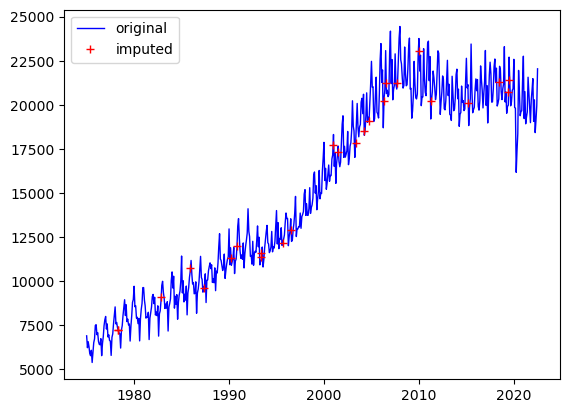

In [8]:
plt.plot(data['Date'], data['Electric power consumption in Spain'], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")

In [9]:
## ---

In [10]:
## ---

In [11]:
## Now test outlier imputation for TWO consectuive outliers.
N_consec = 2
n_start = randint(0, len(data)-N_consec-1)
x = np.arange(n_start,n_start+N_consec)
data_modified_consec = data.copy()
data_modified_consec.loc[x,'Electric power consumption in Spain'] = -10


In [12]:
## run pyCiSSA with outliers
x_ca, x_casa, rc = cissa_outlier(data_modified_consec['Electric power consumption in Spain'],L,data_per_year,data_per_year,outliers = outliers,errors = errors, eigenvalue_proportion = eigenvalue_proportion)

Initial guess for outliers: [14655.66634 14655.66634]
New points: [15458.90229313 14691.67301204]
Consecutive prediction error: 803.2359531265993 vs target error: 50
New points: [15571.98082832 14792.62936256]
Consecutive prediction error: 113.07853518855336 vs target error: 50
New points: [15599.36961375 14819.82661807]
Consecutive prediction error: 27.388785430184726 vs target error: 50
iteration: 2, error: 15609.369613745337 vs target error: 50
Initial guess for outliers: []
iteration: 0, error: 0.0 vs target error: 50


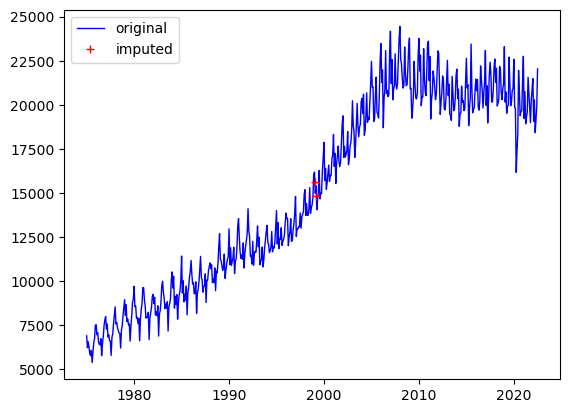

In [13]:
plt.plot(data['Date'], data['Electric power consumption in Spain'], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")

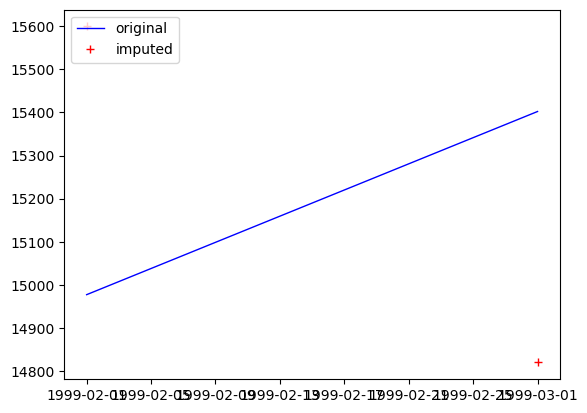

In [14]:
plt.plot(data['Date'][x], data['Electric power consumption in Spain'][x], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")

In [15]:
## ---

In [16]:
## ---

In [17]:
## Now test outlier imputation for FOUR consectuive outliers.
N_consec = 4
n_start = randint(0, len(data)-N_consec-1)
x = np.arange(n_start,n_start+N_consec)
data_modified_consec = data.copy()
data_modified_consec.loc[x,'Electric power consumption in Spain'] = -10

In [18]:
## run pyCiSSA with outliers
x_ca, x_casa, rc = cissa_outlier(data_modified_consec['Electric power consumption in Spain'],L,data_per_year,data_per_year,outliers = outliers,errors = errors, eigenvalue_proportion = eigenvalue_proportion)

Initial guess for outliers: [14640.04858 14640.04858 14640.04858 14640.04858]
New points: [16443.74770409 17044.84552455 17598.35246697 19328.6902369 ]
Consecutive prediction error: 4688.641656900401 vs target error: 50
New points: [18482.54564045 19528.75725411 20149.83713109 21686.83706003]
Consecutive prediction error: 2551.4846641278054 vs target error: 50
New points: [19730.61729357 20305.89146033 21563.19985024 22336.76597629]
Consecutive prediction error: 1413.3627191518026 vs target error: 50
New points: [20153.64772319 20785.79122275 22033.42808964 22735.3081876 ]
Consecutive prediction error: 479.89976242702323 vs target error: 50
New points: [20332.75234132 20992.15660191 22238.83315427 22912.2324053 ]
Consecutive prediction error: 206.36537915815643 vs target error: 50
New points: [20409.9969759  21081.42467412 22328.01415432 22989.27962945]
Consecutive prediction error: 89.26807221276613 vs target error: 50
New points: [20443.43862303 21120.09583181 22366.67742662 23022.70

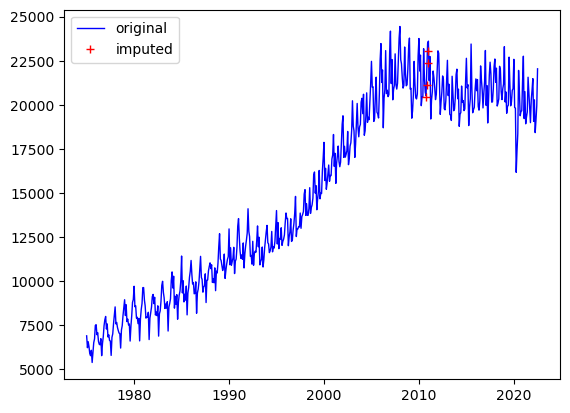

In [19]:
plt.plot(data['Date'], data['Electric power consumption in Spain'], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")

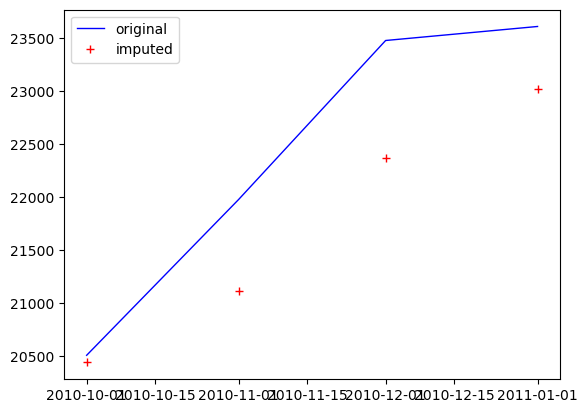

In [20]:
plt.plot(data['Date'][x], data['Electric power consumption in Spain'][x], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")

In [21]:
## ---

In [22]:
## ---

In [23]:
## Now test outlier imputation for EIGHT consectuive outliers.
N_consec = 8
n_start = randint(0, len(data)-N_consec-1)
x = np.arange(n_start,n_start+N_consec)
data_modified_consec = data.copy()
data_modified_consec.loc[x,'Electric power consumption in Spain'] = -10

In [24]:
## run pyCiSSA with outliers
x_ca, x_casa, rc = cissa_outlier(data_modified_consec['Electric power consumption in Spain'],L,data_per_year,data_per_year,outliers = outliers,errors = errors, eigenvalue_proportion = eigenvalue_proportion)

Initial guess for outliers: [14312.69793 14312.69793 14312.69793 14312.69793 14312.69793 14312.69793
 14312.69793 14312.69793]
New points: [16219.95355747 14296.40508693 13901.21225856 14653.56899519
 15436.31804772 15576.77928623 15486.05122863 16162.09875334]
Consecutive prediction error: 1907.2556274727722 vs target error: 50
New points: [16675.89366452 14824.43619232 14481.84412384 15325.28152687
 16235.38548    16469.38599075 16362.37437567 16899.60443562]
Consecutive prediction error: 892.6067045197287 vs target error: 50
New points: [17506.54579712 15953.58528295 15813.70900527 16754.77492643
 17653.07093356 17756.73513326 17398.20982273 17583.42215768]
Consecutive prediction error: 1429.4933995641895 vs target error: 50
New points: [18193.52843265 16799.97726173 16768.9390939  17760.17512135
 18651.16848363 18691.01351509 18213.11662606 18233.69883121]
Consecutive prediction error: 1005.400194914444 vs target error: 50
New points: [19141.8097469  17352.10538175 18120.5624447  1

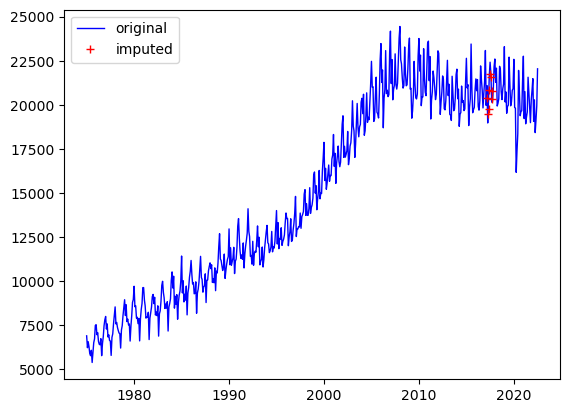

In [25]:
plt.plot(data['Date'], data['Electric power consumption in Spain'], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")

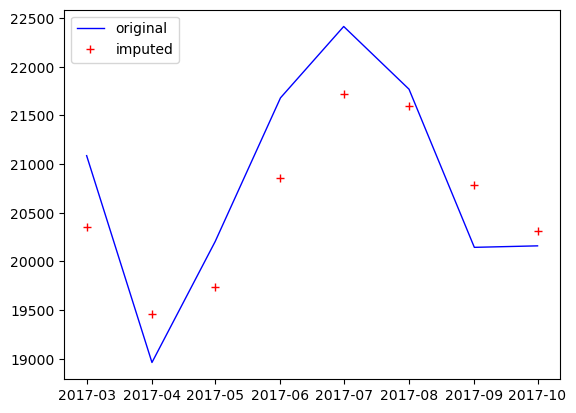

In [26]:
plt.plot(data['Date'][x], data['Electric power consumption in Spain'][x], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")

In [27]:
## ---

In [28]:
## ---

In [29]:
## Now test outlier imputation for TWELVE consectuive outliers.
N_consec = 12
n_start = randint(0, len(data)-N_consec-1)
x = np.arange(n_start,n_start+N_consec)
data_modified_consec = data.copy()
data_modified_consec.loc[x,'Electric power consumption in Spain'] = -10

In [30]:
## run pyCiSSA with outliers
x_ca, x_casa, rc = cissa_outlier(data_modified_consec['Electric power consumption in Spain'],L,data_per_year,data_per_year,outliers = outliers,errors = errors, eigenvalue_proportion = eigenvalue_proportion)

Initial guess for outliers: [14101.01119 14101.01119 14101.01119 14101.01119 14101.01119 14101.01119
 14101.01119 14101.01119 14101.01119 14101.01119 14101.01119 14101.01119]
New points: [15914.64402482 15625.35328937 15057.12656639 15504.94120964
 14185.34843242 13643.72184719 12630.12467525 13883.17273145
 14787.69440443 16482.44063275 16151.90652867 16315.51537416]
Consecutive prediction error: 2381.429442752078 vs target error: 50
New points: [16426.2033328  16230.18038461 15659.26122311 16167.64196834
 14729.93911649 14155.36615066 13062.2032743  14463.80339514
 15478.60102242 17364.79898765 16995.4631929  17119.54138041]
Consecutive prediction error: 882.3583548994466 vs target error: 50
New points: [17054.98944991 16334.02168976 16449.35718355 16423.17314431
 15632.2597876  14476.43227432 13993.87720987 14799.60932345
 16409.89511559 17668.16696846 17832.30898542 17265.30250778]
Consecutive prediction error: 931.67393556768 vs target error: 50
New points: [17353.28489773 16711.0

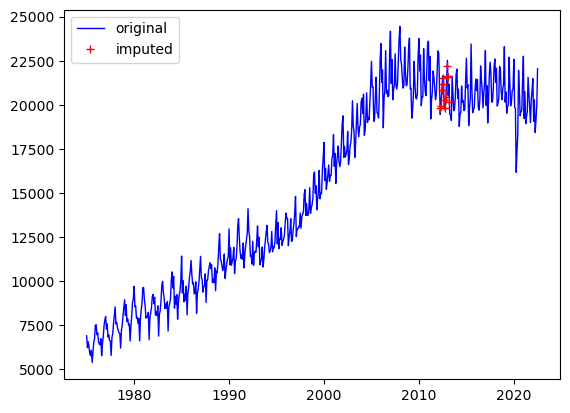

In [31]:
plt.plot(data['Date'], data['Electric power consumption in Spain'], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")

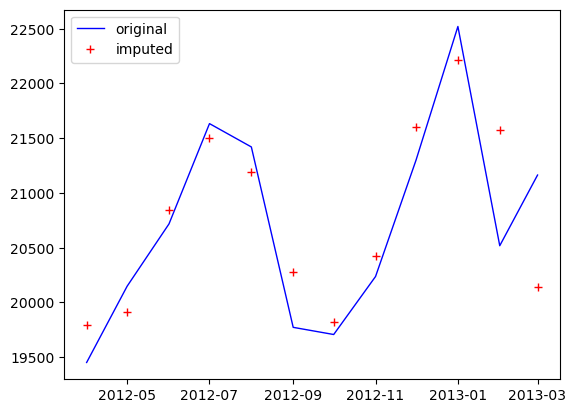

In [32]:
plt.plot(data['Date'][x], data['Electric power consumption in Spain'][x], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")

In [33]:
## ---

In [34]:
## ---

In [35]:
## Now test outlier imputation for TWENTY FOUR consectuive outliers.
N_consec = 24
n_start = randint(0, len(data)-N_consec-1)
x = np.arange(n_start,n_start+N_consec)
data_modified_consec = data.copy()
data_modified_consec.loc[x,'Electric power consumption in Spain'] = -10

In [36]:
## run pyCiSSA with outliers
x_ca, x_casa, rc = cissa_outlier(data_modified_consec['Electric power consumption in Spain'],L,data_per_year,data_per_year,outliers = outliers,errors = errors, eigenvalue_proportion = eigenvalue_proportion)

Initial guess for outliers: [15562.37164 15562.37164 15562.37164 15562.37164 15562.37164 15562.37164
 15562.37164 15562.37164 15562.37164 15562.37164 15562.37164 15562.37164
 15562.37164 15562.37164 15562.37164 15562.37164 15562.37164 15562.37164
 15562.37164 15562.37164 15562.37164 15562.37164 15562.37164 15562.37164]
New points: [12269.77929334 12858.97961834 14077.53980493 14713.25452664
 15914.95867425 16191.81111348 16639.73558143 16057.15764583
 15943.03192531 15277.84398001 15385.57977785 14931.3678675
 15105.90325742 14736.73952896 15237.4703548  15406.63795863
 16318.14706387 16376.67708471 16599.17045298 15727.63557472
 15231.780307   14026.1538343  13401.87233481 11981.65921599]
Consecutive prediction error: 3580.712424013318 vs target error: 50
New points: [10879.24809683 11811.92080136 12910.14880788 14167.62061735
 15381.32432254 16239.6765862  16543.74734343 16352.8743815
 15931.4442969  15537.9323179  15261.62924194 15048.95167766
 14868.67948346 14823.06212579 15066.03

New points: [ 8497.47778438  8814.50821358  9448.90503017 10449.07836854
 11603.19035867 12555.86144337 13062.84830955 13156.16551509
 13071.68686511 13018.7805922  13009.2702927  12917.07324756
 12677.12550954 12416.50145857 12354.22136155 12579.90162841
 12909.47018119 12998.76263485 12615.36572435 11821.09387162
 10897.39001343 10103.40179303  9482.59948623  8913.80262653]
Consecutive prediction error: 173.80136005444365 vs target error: 50
New points: [ 8455.90108236  8756.82878758  9374.61744719 10358.56311797
 11496.97421854 12434.43172196 12927.14084323 13008.14411845
 12914.32605761 12855.34968896 12842.49639707 12748.93005153
 12509.38706442 12251.49314385 12195.04593519 12429.91034653
 12771.45127942 12874.53791285 12506.03924359 11727.55286246
 10820.44827677 10043.3524219   9438.58532332  8883.66146754]
Consecutive prediction error: 168.14319602488285 vs target error: 50
New points: [ 8416.50093511  8702.00111407  9303.68279127 10271.74439005
 11394.78168171 12317.44786486 

New points: [ 7944.89771972  8039.79960533  8438.07839746  9201.73230892
 10125.06060381 10855.37044909 11154.52038965 11066.22556845
 10838.8285864  10687.48718724 10620.25908969 10502.8208414
 10265.75032938 10039.71313387 10051.895985   10396.68986997
 10886.37642998 11166.55419336 10994.32884419 10425.24894253
  9737.41354102  9183.80054843  8795.19198937  8433.95767975]
Consecutive prediction error: 92.70685707214398 vs target error: 50
New points: [ 7925.20621239  8012.00697608  8401.56538242  9156.39523815
 10071.07225062 10793.04220512 11084.38782645 10989.22911567
 10756.3579593  10601.17450186 10531.64524714 10413.16358162
 10176.11714932  9951.24911559  9966.01861615 10315.01830203
 10810.45403278 11097.58818541 10933.13392309 10372.37397157
  9693.2663509   9148.58400884  8768.68071518  8415.32795239]
Consecutive prediction error: 89.65725977996408 vs target error: 50
New points: [ 7906.16516548  7985.12825403  8366.24907159  9112.54186925
 10018.85115312 10732.75662708 110

New points: [ 7661.96950261  7640.19128801  7912.95812394  8549.98315544
  9349.71504836  9961.31685857 10149.51388096  9963.55937075
  9658.23109552  9452.35293167  9352.82803672  9221.22870616
  8985.22332841  8776.46561847  8826.0919311   9231.52747863
  9804.02626465 10184.25297516 10123.4803612   9673.32732479
  9109.91879089  8683.45692278  8418.72591915  8169.56468866]
Consecutive prediction error: 49.090022108915946 vs target error: 50
iteration: 2, error: 10194.252975159066 vs target error: 50
Initial guess for outliers: []
iteration: 0, error: 0.0 vs target error: 50


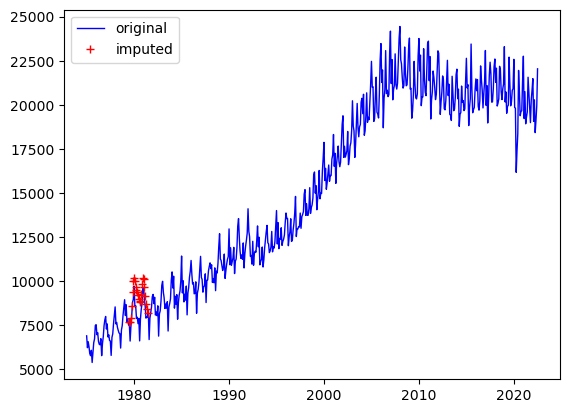

In [37]:
plt.plot(data['Date'], data['Electric power consumption in Spain'], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")

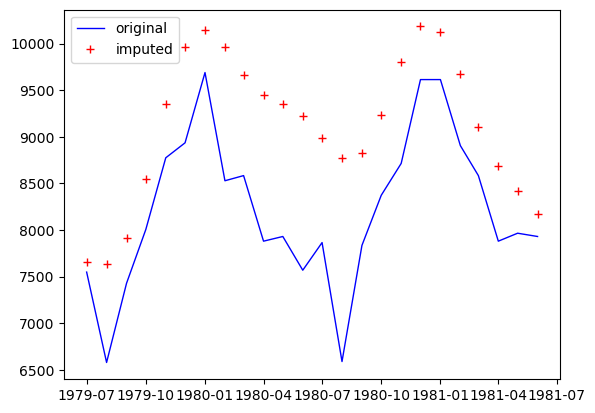

In [38]:
plt.plot(data['Date'][x], data['Electric power consumption in Spain'][x], 'b', lw=1.0, label = 'original')
plt.plot(data.loc[x,'Date'], x_ca[x], 'r+', lw=1.0, label = 'imputed')
plt.legend(loc="upper left")